# 1- Data Preparation

## The Data
On dispose des données de vente journalière de chez BND. L’extraction contient l’historique de ventes entre le premier trimestre 2016 jusqu’à la 3 semaine de janvier 2018.

Les ventes sont groupées au niveau P2 où tous les produits sont pris en compte séparément et en incluant les ventes promotionnelles. Le groupement des ventes par client est fait au niveau C4 où les résultats sont sommés par distributeur.

In [20]:
product_raw_df.head()

Product  Client  04/01/2016  05/01/2016  06/01/2016  07/01/2016  \
0  GBA001AUC180FS  68L041        0.00        2.00        0.00        2.00   
1  GBA001AUC180FS  68L042        0.00        1.00        2.00        1.00   
2  GBA001BND060FS  68C011        0.00        0.00        0.00        0.00   
3  GBA001BND060FS  68C120        0.00        0.00        0.00        0.00   
4  GBA001BND060FS  68C123        0.00        0.00        0.00        0.00   

   08/01/2016  09/01/2016  10/01/2016  11/01/2016     ...      14/01/2018  \
0        0.00        3.00        0.00        0.00     ...            0.00   
1        0.00        2.00        0.00        1.00     ...            0.00   
2        0.00        0.00        0.00        0.00     ...            0.00   
3        0.00        0.00        0.00        0.00     ...            0.00   
4        0.00        0.00        0.00        0.00     ...            0.00   

   15/01/2018  16/01/2018  17/01/2018  18/01/2018  19/01/2018  20/01/2018  \
0        0.00        0.00        0.00        0.00        0.00        0.00   
1        0.00        0.00        0.00        0.00        0.00        0.00   
2        0.00        0.00        0.00        0.00        0.00        0.00   
3        0.00        0.00        0.00        0.00        0.00        0.00   
4        0.00        0.00        0.00        0.00        0.00        0.00   

   21/01/2018  22/01/2018  23/01/2018  
0        0.00        0.00        0.00  
1        0.00        0.00        0.00  
2        0.00        0.00        0.00  
3        0.00        0.00        0.00  
4        0.00        0.00        0.00  

[5 rows x 753 columns]

### Week Resampling

La fluctuation des ventes journalières de certains produits étant très importantes, nous allons considérer les ventes sur la base des historiques hebdomadaires.

In [21]:
weekly_product_df = product_df.resample('W',axis=1).mean()
product_df.head()

2016-01-10  2016-01-17  2016-01-24  2016-01-31  2016-02-07  2016-02-14  \
0        1.00        1.14        1.29        1.00        0.71        1.43   
1        0.86        1.43        1.57        1.57        1.71        1.29   
2        0.00        0.00        0.00        0.00        0.00        0.00   
3        0.00        0.00        0.00        0.00        0.00        0.00   
4        0.00        0.00        0.00        0.00        0.00        0.00   

   2016-02-21  2016-02-28  2016-03-06  2016-03-13     ...      2017-11-26  \
0        1.86        1.57        1.00        1.57     ...            0.00   
1        1.71        1.29        1.00        0.57     ...            0.00   
2        0.00        0.00        0.00        0.00     ...            0.00   
3        0.00        0.00        0.00        0.00     ...            2.29   
4        0.00        0.00        0.00        0.00     ...            0.00   

   2017-12-03  2017-12-10  2017-12-17  2017-12-24  2017-12-31  2018-01-07  \
0        0.00        0.00        0.00        0.00        0.00        0.00   
1        0.00        0.00        0.00        0.00        0.00        0.00   
2        0.00        0.00        0.00        0.00        0.00        0.00   
3        1.29        0.00        0.00        0.00        0.00        0.00   
4        0.00        0.00        0.00        0.00        0.00        0.00   

   2018-01-14  2018-01-21  2018-01-28  
0        0.00        0.00        0.00  
1        0.00        0.00        0.00  
2        0.00        0.00        0.00  
3        0.00        0.00        0.00  
4        0.00        0.00        0.00  

[5 rows x 108 columns]

# Cleaning Series
A series of cleaning functions is applied to raw data in order to get rid of irrelevant and "dirty" data with patterns that could disrupt the model.

Each function has a threashold parameter in order to adapt the filtering

### Trimming Zeros from series
Remove empty data on the two sides

In [23]:
product_df.head()

The last 8 values (complete zeros) of each series have been dropped 
The first 0 values (complete zeros) of each series have been dropped 


2016-01-10  2016-01-17  2016-01-24  2016-01-31  2016-02-07  2016-02-14  \
0        1.00        1.14        1.29        1.00        0.71        1.43   
1        0.86        1.43        1.57        1.57        1.71        1.29   
2        0.00        0.00        0.00        0.00        0.00        0.00   
3        0.00        0.00        0.00        0.00        0.00        0.00   
4        0.00        0.00        0.00        0.00        0.00        0.00   

   2016-02-21  2016-02-28  2016-03-06  2016-03-13     ...      2017-10-01  \
0        1.86        1.57        1.00        1.57     ...            0.00   
1        1.71        1.29        1.00        0.57     ...            0.00   
2        0.00        0.00        0.00        0.00     ...            1.14   
3        0.00        0.00        0.00        0.00     ...            1.57   
4        0.00        0.00        0.00        0.00     ...            0.00   

   2017-10-08  2017-10-15  2017-10-22  2017-10-29  2017-11-05  2017-11-12  \
0        0.00        0.00        0.00        0.00        0.00        0.00   
1        0.00        0.00        0.00        0.00        0.00        0.00   
2        1.57        1.14        0.86        1.29        1.14        0.29   
3        2.29        2.00        2.14        2.00        2.43        2.86   
4        0.00        0.00        0.00        0.00        0.00        0.00   

   2017-11-19  2017-11-26  2017-12-03  
0        0.00        0.00        0.00  
1        0.00        0.00        0.00  
2        0.00        0.00        0.00  
3        1.14        2.29        1.29  
4        0.00        0.00        0.00  

[5 rows x 100 columns]

### Tailing Zeros: No longer sold
Remove the products that werent sold in the **last 15 weeks**

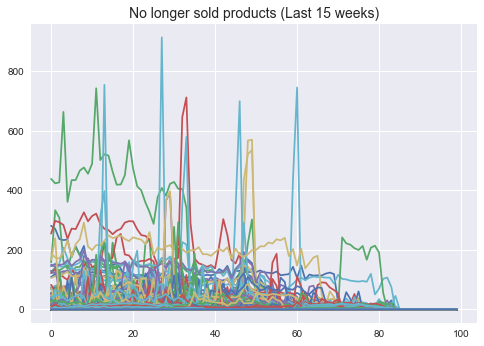

Series With 15 trailing zeros are removed
Removed: 4327 , Remaining: 4319


In [24]:
t = 15

### Leading Zeros: Recently launched
Remove the products which werent sold in the **15 first weeks**

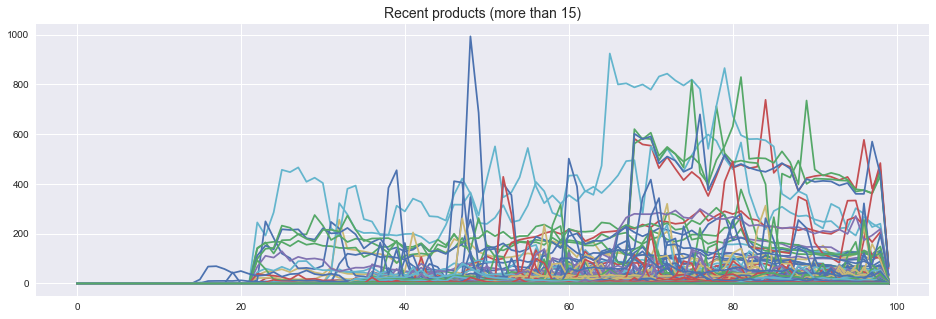

Series With more than 15 zeros are removed
Removed: 1472 , Remaining: 2847


In [25]:
t = 15

In [27]:
product_df_clean = product_df
print(product_df.shape)
product_df.head()

(2847, 100)


2016-01-10  2016-01-17  2016-01-24  2016-01-31  2016-02-07  2016-02-14  \
37        4.71        4.29        4.71        5.14        4.14        4.57   
39        8.57       13.71       11.86        6.29        6.29        6.14   
40        3.71        0.86        0.43        0.14        0.29        0.29   
44        1.14        1.29        0.86        1.43        2.86        1.29   
45        1.14        0.71        0.86        1.14        1.14        1.14   

    2016-02-21  2016-02-28  2016-03-06  2016-03-13     ...      2017-10-01  \
37        4.71        5.00        4.00        4.57     ...            2.29   
39        6.29        5.14        5.29        6.14     ...            7.86   
40        1.00        0.43        2.00        4.14     ...            1.29   
44        1.57        1.86        1.86        1.71     ...            0.29   
45        1.43        0.86        1.14        0.86     ...            0.86   

    2017-10-08  2017-10-15  2017-10-22  2017-10-29  2017-11-05  2017-11-12  \
37        1.71        2.14        1.86        2.29        2.14        1.71   
39        9.71       19.29       17.29        9.00        8.00        7.14   
40        1.29        1.29        1.29        1.00        1.29        1.00   
44        0.14        0.29        0.43        0.71        0.29        0.71   
45        1.29        1.29        1.29        1.00        1.00        0.57   

    2017-11-19  2017-11-26  2017-12-03  
37        3.00        2.57        0.00  
39        0.00        0.00        0.00  
40        0.00        0.00        0.00  
44        0.00        0.00        0.00  
45        0.00        0.00        0.00  

[5 rows x 100 columns]

### Rolling Average

Apply a rolling average filter using a window of size = 4 , then remove rare sales

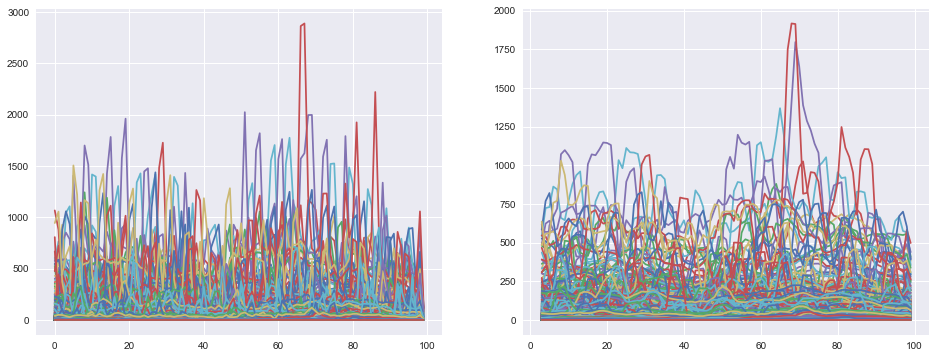

(2847, 97)


In [28]:
window = 4

### Remove Outliers - Winsorizing
Winsorizing is to set all outliers to a specified percentile of the data; for example, a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile

C:\Users\rahmim00\AppData\Local\Continuum\anaconda3\envs\dev_py34\lib\site-packages\scipy\stats\stats.py:2245: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))
C:\Users\rahmim00\AppData\Local\Continuum\anaconda3\envs\dev_py34\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


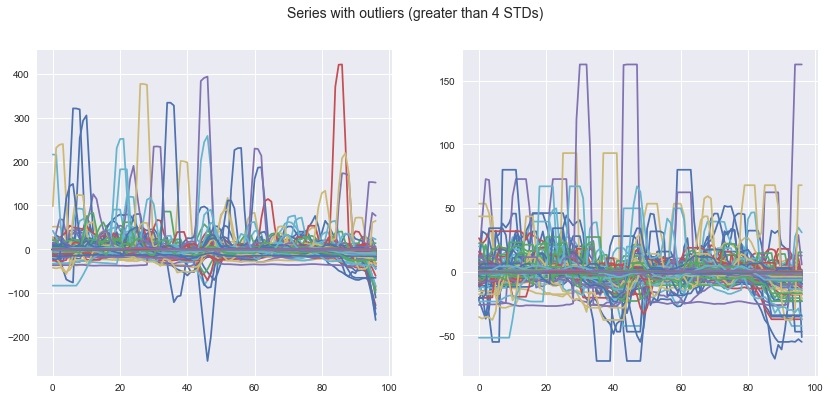

In [29]:
t = 4

### Mainly Zeros: Rare sales
Remove the products that werent sold for **at least 5 weeks**

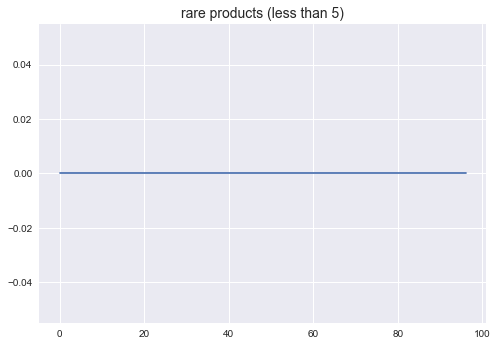

Series With less than 5 values are removed
Removed: 1 , Remaining: 2846


In [30]:
t = 5

In [31]:
product_df_keep = product_df
print(product_df.shape)
product_df.head()

(2846, 97)


2016-01-24  2016-01-31  2016-02-07  2016-02-14  2016-02-21  2016-02-28  \
37        4.46        4.46        4.46        4.46        4.46        4.46   
39       10.11        9.54        7.64        6.25        5.96        5.71   
40        1.29        0.43        0.43        0.43        0.50        0.93   
44        1.18        1.61        1.61        1.79        1.89        1.64   
45        0.96        0.96        1.07        1.21        1.14        1.14   

    2016-03-06  2016-03-13  2016-03-20  2016-03-27     ...      2017-09-24  \
37        4.46        4.46        4.25        4.32     ...            2.25   
39        5.71        7.21       10.75       13.36     ...           11.68   
40        1.89        3.04        3.07        2.79     ...            1.00   
44        1.75        1.82        1.75        1.82     ...            0.46   
45        1.07        0.96        0.93        0.93     ...            1.11   

    2017-10-01  2017-10-08  2017-10-15  2017-10-22  2017-10-29  2017-11-05  \
37        2.04        2.04        2.04        2.04        2.11        2.04   
39        8.89       11.43       13.54       13.64       13.39       10.36   
40        1.11        1.21        1.29        1.21        1.21        1.14   
44        0.43        0.43        0.43        0.43        0.43        0.54   
45        1.21        1.14        1.18        1.21        1.14        0.96   

    2017-11-12  2017-11-19  2017-11-26  
37        2.29        2.36        2.04  
39        6.04        5.29        5.29  
40        0.82        0.57        0.43  
44        0.43        0.43        0.43  
45        0.71        0.71        0.71  

[5 rows x 97 columns]

### Normalize Data
We end up with 2846 product/client . Apply a Z-normalization (subtract the mean and divide by the standard deviation) in order to get a **scale-independent** data

In [33]:
product_df_full.head()

Product  Client  2016-01-24 00:00:00  2016-01-31 00:00:00  \
37  GBA001BND060SS  68A139                 1.61                 1.61   
39  GBA001BND060SS  68C120                 0.51                 0.30   
40  GBA001BND060SS  68C122                -0.15                -1.04   
44  GBA001BND060SS  68C126                -0.11                 0.65   
45  GBA001BND060SS  68C129                -0.35                -0.35   

    2016-02-07 00:00:00  2016-02-14 00:00:00  2016-02-21 00:00:00  \
37                 1.61                 1.61                 1.61   
39                -0.40                -0.91                -1.01   
40                -1.04                -1.04                -0.96   
44                 0.65                 0.97                 1.16   
45                 0.33                 1.25                 0.79   

    2016-02-28 00:00:00  2016-03-06 00:00:00  2016-03-13 00:00:00  \
37                 1.61                 1.61                 1.61   
39                -1.10                -1.10                -0.55   
40                -0.52                 0.48                 1.66   
44                 0.71                 0.90                 1.03   
45                 0.79                 0.33                -0.35   

           ...           2017-09-24 00:00:00  2017-10-01 00:00:00  \
37         ...                         -1.00                -1.26   
39         ...                          1.08                 0.06   
40         ...                         -0.45                -0.33   
44         ...                         -1.37                -1.43   
45         ...                          0.56                 1.25   

    2017-10-08 00:00:00  2017-10-15 00:00:00  2017-10-22 00:00:00  \
37                -1.26                -1.26                -1.26   
39                 0.99                 1.76                 1.80   
40                -0.22                -0.15                -0.22   
44                -1.43                -1.43                -1.43   
45                 0.79                 1.02                 1.25   

    2017-10-29 00:00:00  2017-11-05 00:00:00  2017-11-12 00:00:00  \
37                -1.17                -1.26                -0.96   
39                 1.71                 0.60                -0.98   
40                -0.22                -0.30                -0.63   
44                -1.43                -1.24                -1.43   
45                 0.79                -0.35                -1.95   

    2017-11-19 00:00:00  2017-11-26 00:00:00  
37                -0.88                -1.26  
39                -1.26                -1.26  
40                -0.89                -1.04  
44                -1.43                -1.43  
45                -1.95                -1.95  

[5 rows x 99 columns]

# 2. Principal Components Analysis
L'Analyse en Composantes Principales est une méthode de projection qui permet de projeter les observations dans un espace de dimensions réduites tel qu'un maximum d'information soit conservée. 

Si l'information associée aux 2 ou 3 premiers axes représente un pourcentage suffisant de la variabilité totale du nuage de points, on pourra représenter les observations sur un graphique à 2 ou 3 dimensions, facilitant ainsi grandement l'interprétation.

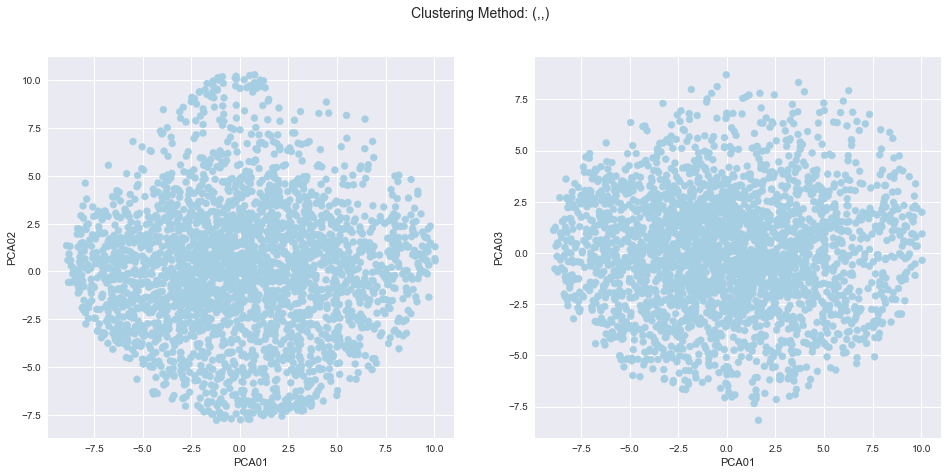

[ 0.192122    0.13360553  0.0868289   0.07429497  0.04438952]


In [34]:
hlp.Clusters_plot(X= X_pca, labels = np.zeros(len(X_pca)))

## PCA 01
Affiche une tendance croissante dans le temps.

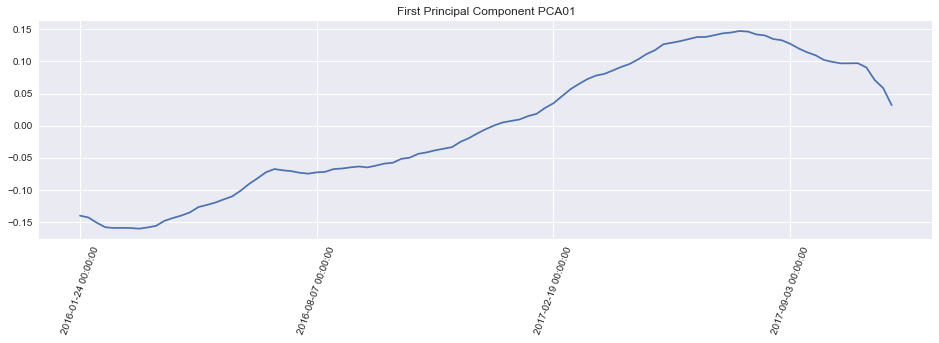

In [36]:
plt.plot(range(nb_col), princ_axis [1,:])

## PCA 02
Oppose les ventes en terme de saisonnalité. Les produits corrélés avec cet axe ont tendance à être vendu durant les périodes d’Automne ou début d’été.

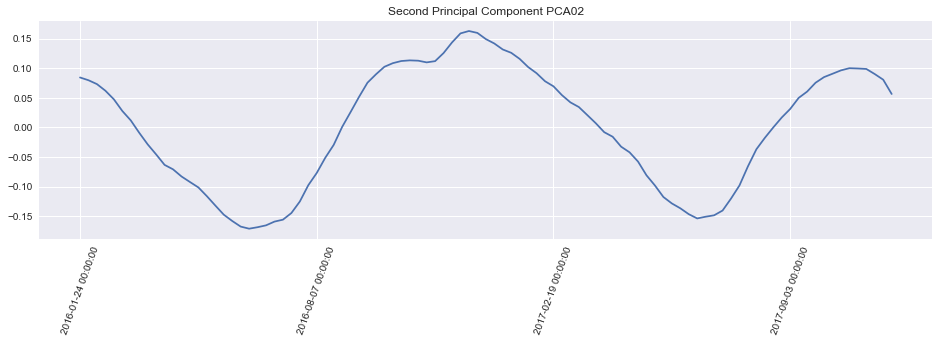

In [37]:
plt.plot(range(nb_col), princ_axis [2,:])

Produit 1744


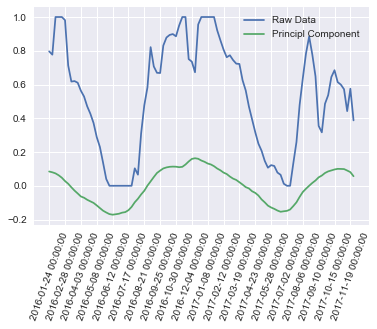

In [49]:
corrSamples = hlp.GetMostCorrelatedTo(X_pca,component,index=product_df.index)

# 3. Modeling - Clustering Algorithms
Try out Hierarchical clustering, kMeans and kMedodis  on raw (cleaned) data. Then, do a **PCA plot** to visualize the result of the clustering on the principal components

In [61]:
product_df_full.head()

Product  Client  2016-01-24 00:00:00  2016-01-31 00:00:00  \
0  GBA001BND060SS  68A139                 1.61                 1.61   
1  GBA001BND060SS  68C120                 0.51                 0.30   
2  GBA001BND060SS  68C122                -0.15                -1.04   
3  GBA001BND060SS  68C126                -0.11                 0.65   
4  GBA001BND060SS  68C129                -0.35                -0.35   

   2016-02-07 00:00:00  2016-02-14 00:00:00  2016-02-21 00:00:00  \
0                 1.61                 1.61                 1.61   
1                -0.40                -0.91                -1.01   
2                -1.04                -1.04                -0.96   
3                 0.65                 0.97                 1.16   
4                 0.33                 1.25                 0.79   

   2016-02-28 00:00:00  2016-03-06 00:00:00  2016-03-13 00:00:00  \
0                 1.61                 1.61                 1.61   
1                -1.10                -1.10                -0.55   
2                -0.52                 0.48                 1.66   
3                 0.71                 0.90                 1.03   
4                 0.79                 0.33                -0.35   

          ...           2017-09-24 00:00:00  2017-10-01 00:00:00  \
0         ...                         -1.00                -1.26   
1         ...                          1.08                 0.06   
2         ...                         -0.45                -0.33   
3         ...                         -1.37                -1.43   
4         ...                          0.56                 1.25   

   2017-10-08 00:00:00  2017-10-15 00:00:00  2017-10-22 00:00:00  \
0                -1.26                -1.26                -1.26   
1                 0.99                 1.76                 1.80   
2                -0.22                -0.15                -0.22   
3                -1.43                -1.43                -1.43   
4                 0.79                 1.02                 1.25   

   2017-10-29 00:00:00  2017-11-05 00:00:00  2017-11-12 00:00:00  \
0                -1.17                -1.26                -0.96   
1                 1.71                 0.60                -0.98   
2                -0.22                -0.30                -0.63   
3                -1.43                -1.24                -1.43   
4                 0.79                -0.35                -1.95   

   2017-11-19 00:00:00  2017-11-26 00:00:00  
0                -0.88                -1.26  
1                -1.26                -1.26  
2                -0.89                -1.04  
3                -1.43                -1.43  
4                -1.95                -1.95  

[5 rows x 99 columns]

## Métriques d'évaluation
**SSE:** La somme des carrés est une mesure de variation ou d'écart par rapport à la moyenne. Elle représente la somme des carrés des différences par rapport au centre du cluster.

**Silhouette Score**: Permet d'évaluer si chaque point appartient au « bon » cluster : est-il proche des points du cluster auquel il appartient ? Est-il loin des autres points ?


In [ ]:
def getSSE(samples,labels):
    return np.sum( (samples-labels)**2)

def getSilouhaite(samples,labels):
    return metrics.silhouette_score(samples,labels)

## Agglomerative - (CAH)

Le principe est de rassembler les individus qui affichent des courbes similaires (en distance euclidienne ou en corrélation). Les distances sont calculées entre les produits deux à deux. Plus deux observations seront dissemblables, plus la distance sera importante. La CAH va ensuite rassembler les individus de manière itérative afin de produire un dendrogramme ou arbre de classification

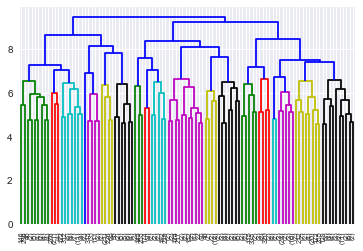

In [59]:
hierarchy.linkage(X_z, method='complete',metric='euclidean')
hierarchy.dendrogram(Z, truncate_mode='lastp', p=100, leaf_rotation=90., leaf_font_size=7., show_contracted=True)

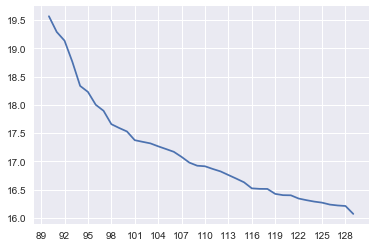

In [253]:
plot_insertie()

### Critère de Ward
La méthode de Ward consiste à regrouper les classes de façon que l'augmentation de l'inertie interclasse soit maximum.

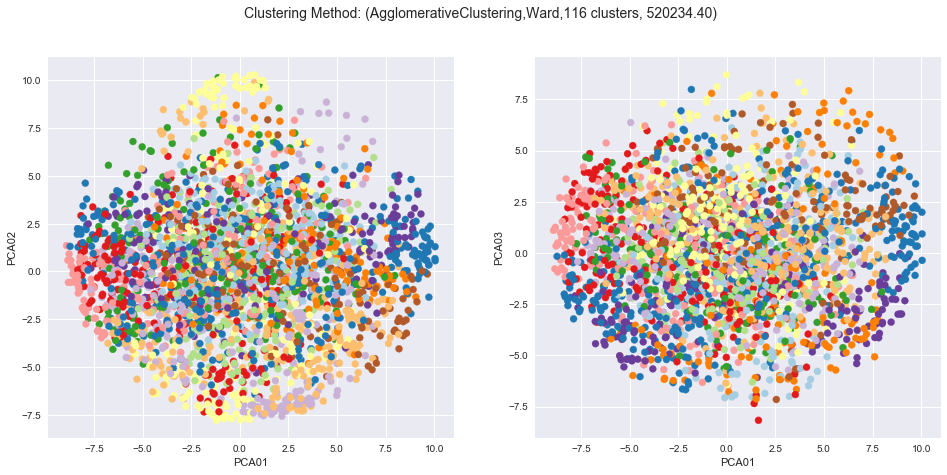

In [254]:
n_cluster = 116
ward = AgglomerativeClustering(n_clusters=n_cluster, linkage='ward').fit(X_z)

## BIRCH Algorithm
Used to perform hierarchical clustering over particularly large data-sets.The advantage of using BIRCH algorithm is its ability to incrementally & dynamically cluster incoming.

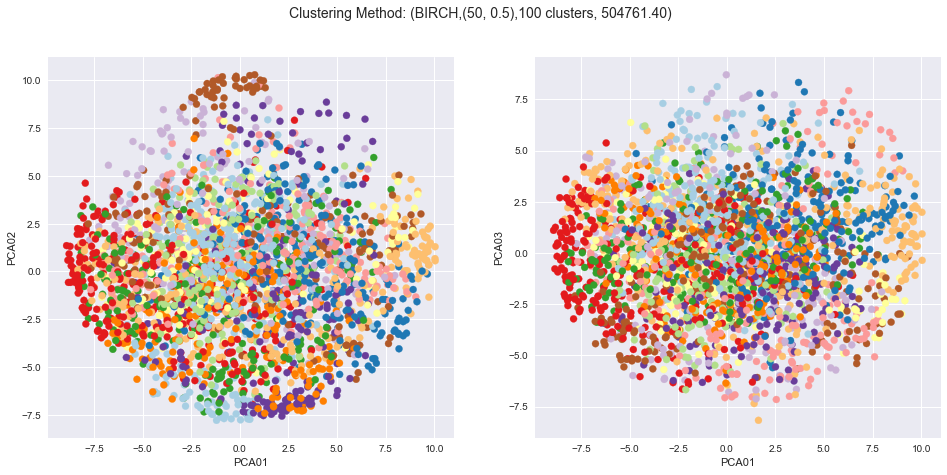

In [75]:
labels_birch = Birch(n_clusters= n_cluster, threshold=0.5, compute_labels=True).fit_predict(X_z)

## Partitionning Algorithms

### SOM (Cartes topologiques auto-organisatrices)
Les cartes auto-organisatrices sont constituées d'une grille. Dans chaque nœud de la grille se trouve un « neurone ». Chaque neurone est lié à un vecteur référent, responsable d'une zone dans l'espace des données (Un certain nombre de courbes similaires).

maxtrainlen %d inf
maxtrainlen %d inf
Topographic error = 0.153900210822; Quantization error = 6.2435798326


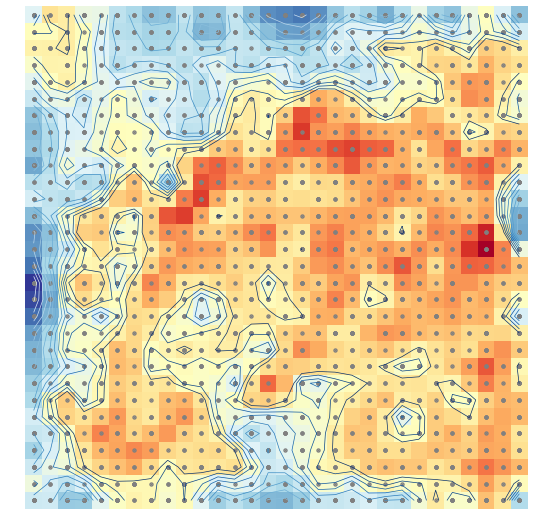

In [67]:
som = sompy.SOMFactory().build(X_z, mapsize, mask=None, mapshape='rectangular', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  

## K-Means Algorithm

The  main  idea  is to define k centers, one for each cluster. then take each point belonging  to a  given data set and associate it to the nearest center. When no point  is  pending, re-calculate k new centroids as barycenter of  the clusters. A new binding has to be done  between  the same data set points  and  the nearest new center. repeat until no more changes  are done ie centers do not move any more.

### K-means: Validate the number of clusters

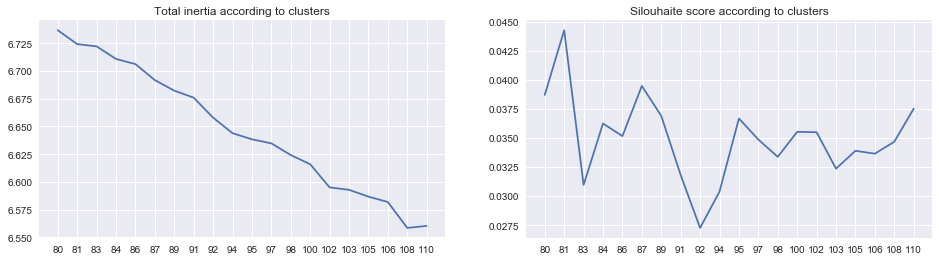

In [81]:
plot_inertia()
plot_silhouaite()

### Apply K-means model

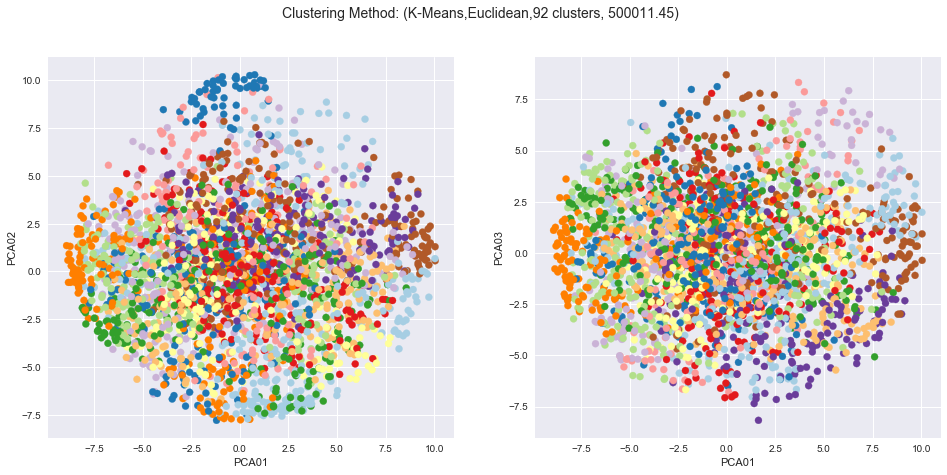

In [255]:
kmeans = KMeans(n_clusters=92).fit(X_z)

## K-medoids (PAM Algorithm)
The k-medoids algorithm is a clustering algorithm related to the k-means algorithm. K-means attempts to minimize the total squared error, while k-medoids minimizes the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the k-means algorithm, k-medoids chooses datapoints as centers ( medoids or exemplars).

### K-medoids Validate the number of clusters

#### Custom distances calculation

In [103]:
corr_distance = squareform(pdist(X_z, 'correlation')) #Pearsons
euclid_distance = squareform(pdist(X_z, 'euclidean'))

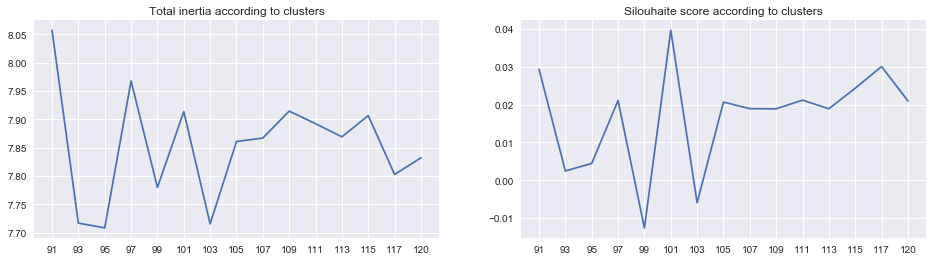

In [139]:
plot_inertia()
plot_silhouaite()

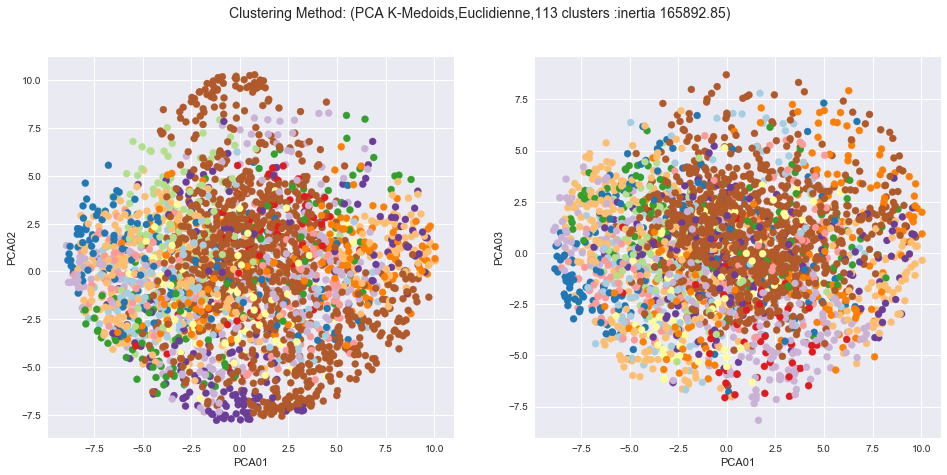

In [195]:
label, medoids_euc = kMedoids.cluster(euclid_distance,k= 113)

In [258]:
df.nlargest(7,"SSE")

SSE
Agg_complete  521,110.11
Ward          510,172.34
Birch         504,761.40
kMeans        500,011.45
kMedoids_corr 178,083.81
kMedoids      165,892.85

# Display Clustering results

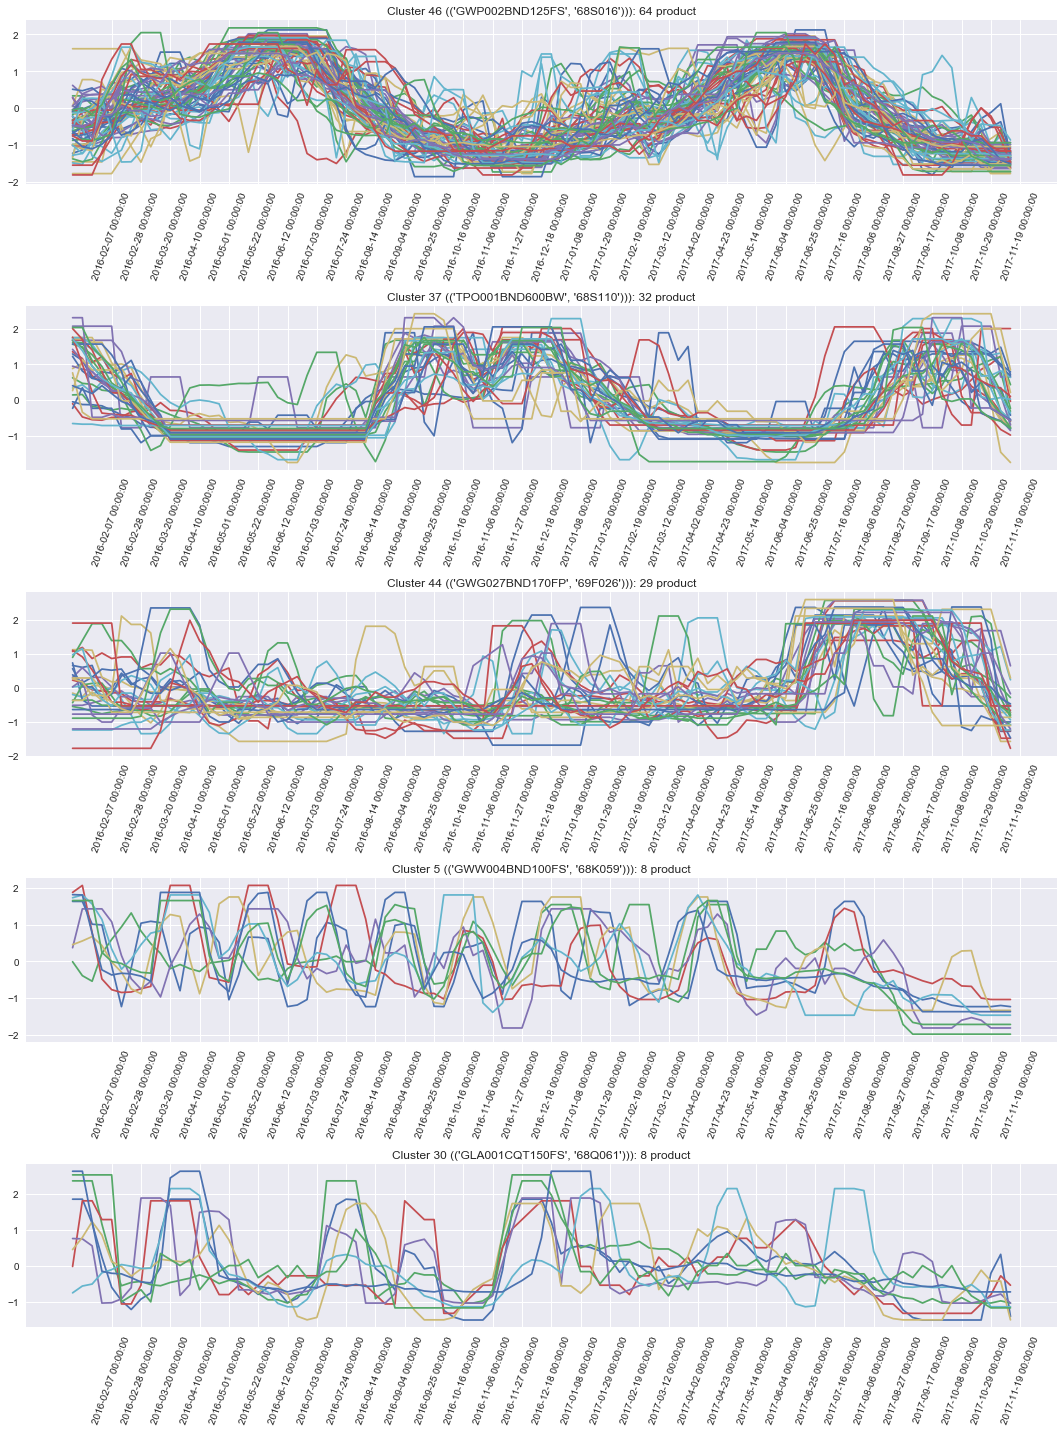

In [224]:
disp = hlp.Cluster_series_plot(data_df = product_df_full, cluster_df = eucl_df,headers = row_headers)

# Forecast quality on clusters - First tests
In this section we'll build forecasts on a **cluster level** using classical Holt-Winter's models. Our goal is to evaluate the quality of the prediction on individual series composing the each cluster after performing a **weighted split**.

The evaluation metric used is the **MASE (mean absolute scaled error)** which is a scale-independant metric calculated wrt the MAE

In [133]:
group_series.head()

2016-01-10 00:00:00  2016-01-17 00:00:00  2016-01-24 00:00:00  \
Cluster                                                                  
1                        401                  467                  422   
2                         97                  103                   66   
3                        371                  276                  119   
4                       1076                 1185                  491   
5                        281                  286                  256   

         2016-01-31 00:00:00  2016-02-07 00:00:00  2016-02-14 00:00:00  \
Cluster                                                                  
1                        520                  466                  219   
2                         36                   37                   36   
3                        507                  515                  148   
4                        278                  251                 1624   
5                        298                  298                  338   

         2016-02-21 00:00:00  2016-02-28 00:00:00  2016-03-06 00:00:00  \
Cluster                                                                  
1                        253                  286                  283   
2                         46                  296                  379   
3                        128                  128                  101   
4                       1366                  451                 1354   
5                        290                  322                  324   

         2016-03-13 00:00:00         ...           2017-10-01 00:00:00  \
Cluster                              ...                                 
1                        506         ...                           350   
2                        109         ...                            37   
3                        523         ...                           498   
4                       1260         ...                           173   
5                        332         ...                           393   

         2017-10-08 00:00:00  2017-10-15 00:00:00  2017-10-22 00:00:00  \
Cluster                                                                  
1                        422                  224                  232   
2                        130                   94                   27   
3                        466                  476                  170   
4                        139                  703                  678   
5                        311                  328                  429   

         2017-10-29 00:00:00  2017-11-05 00:00:00  2017-11-12 00:00:00  \
Cluster                                                                  
1                        179                  193                  192   
2                         15                   13                   10   
3                        122                  116                  743   
4                        219                  154                  161   
5                        311                  288                  249   

         2017-11-19 00:00:00  2017-11-26 00:00:00  2017-12-03 00:00:00  
Cluster                                                                 
1                        107                  134                   19  
2                         10                   11                    2  
3                        183                  168                   21  
4                        125                  268                   84  
5                        143                  211                   34  

[5 rows x 100 columns]

## Building Holt-Winter's Models

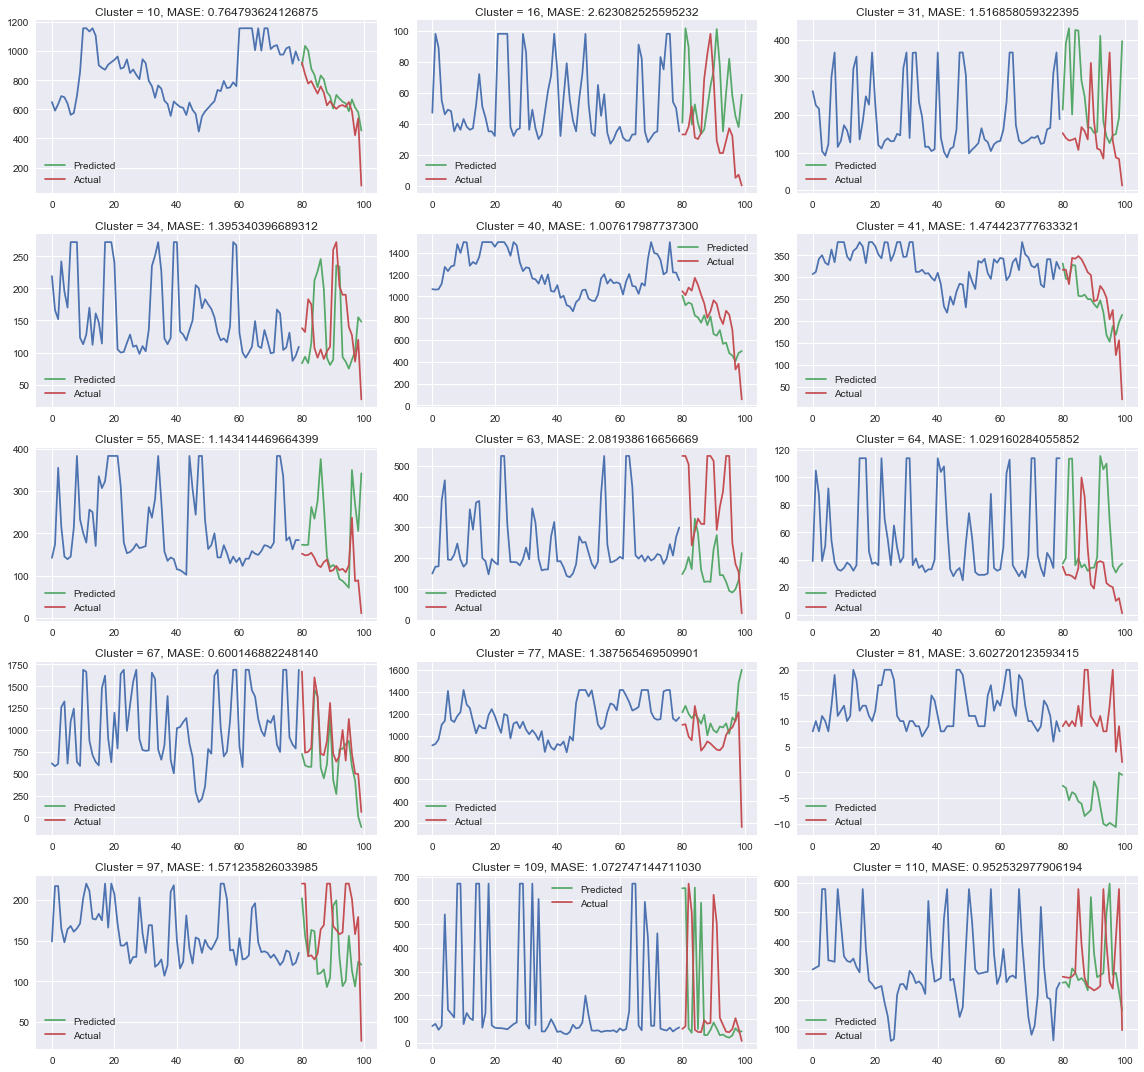

In [141]:
forecast = pd.DataFrame(forecasts,columns = group_series.columns[-fc:],index = group_series.index)

## Forecast Split Forecast

Agg  Split  Forecast  Increase   Bias
count 113.00 113.00    113.00    113.00 113.00
mean    1.28   1.24      1.87      7.92 -27.62
std     0.69   0.73      1.32     52.28  22.98
min     0.25   0.46      0.71    -61.35 -81.73
25%     0.88   0.84      1.14    -22.37 -39.27
50%     1.09   1.05      1.46     -5.56 -28.47
75%     1.56   1.35      2.06     23.26 -17.14
max     3.60   4.89      8.66    286.80  54.02

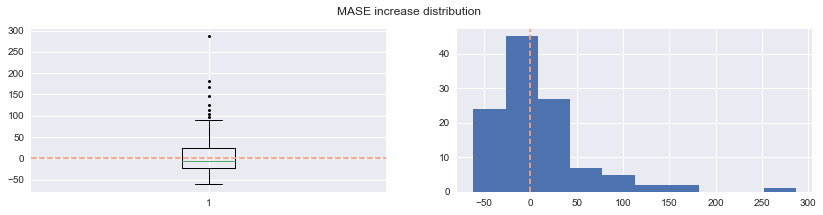

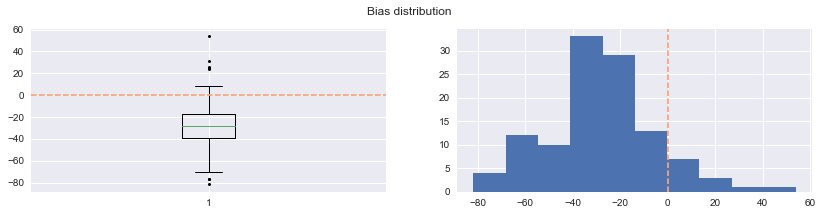

In [227]:
display(mase_variation.describe())

## More numbers...
1.  The percentage of clusters where the forecast quality increases at the split level: We compare the average forecast quality at the **split level** to the forecast on **the aggregation level** of the cluster.

2. The percentage of "good" forecasts where the quality decreases with less than 20% 

3. The percentage of products where the **split forecast** is better than a **specific forecast**

In [167]:
display(mase_variation[good_splits].sort_values(by=["Agg"]).head())

Increased Forecast quality: 55.75%
Good Forecast quality: 77.88%
Better than detail Forecast quality: 90.27%


Agg  Split  Forecast  Increase   Bias
18 0.25   0.53      1.00    112.72 -46.38
91 0.35   0.57      0.91     64.06 -37.26
99 0.42   0.46      0.71      9.42 -35.83
7  0.42   0.57      1.52     36.52 -62.34
68 0.48   0.74      1.11     54.20 -32.78

## Displaying forecasts 

Cluster 99 split:0.46 , agg:0.42 *** Increase 9.42 %


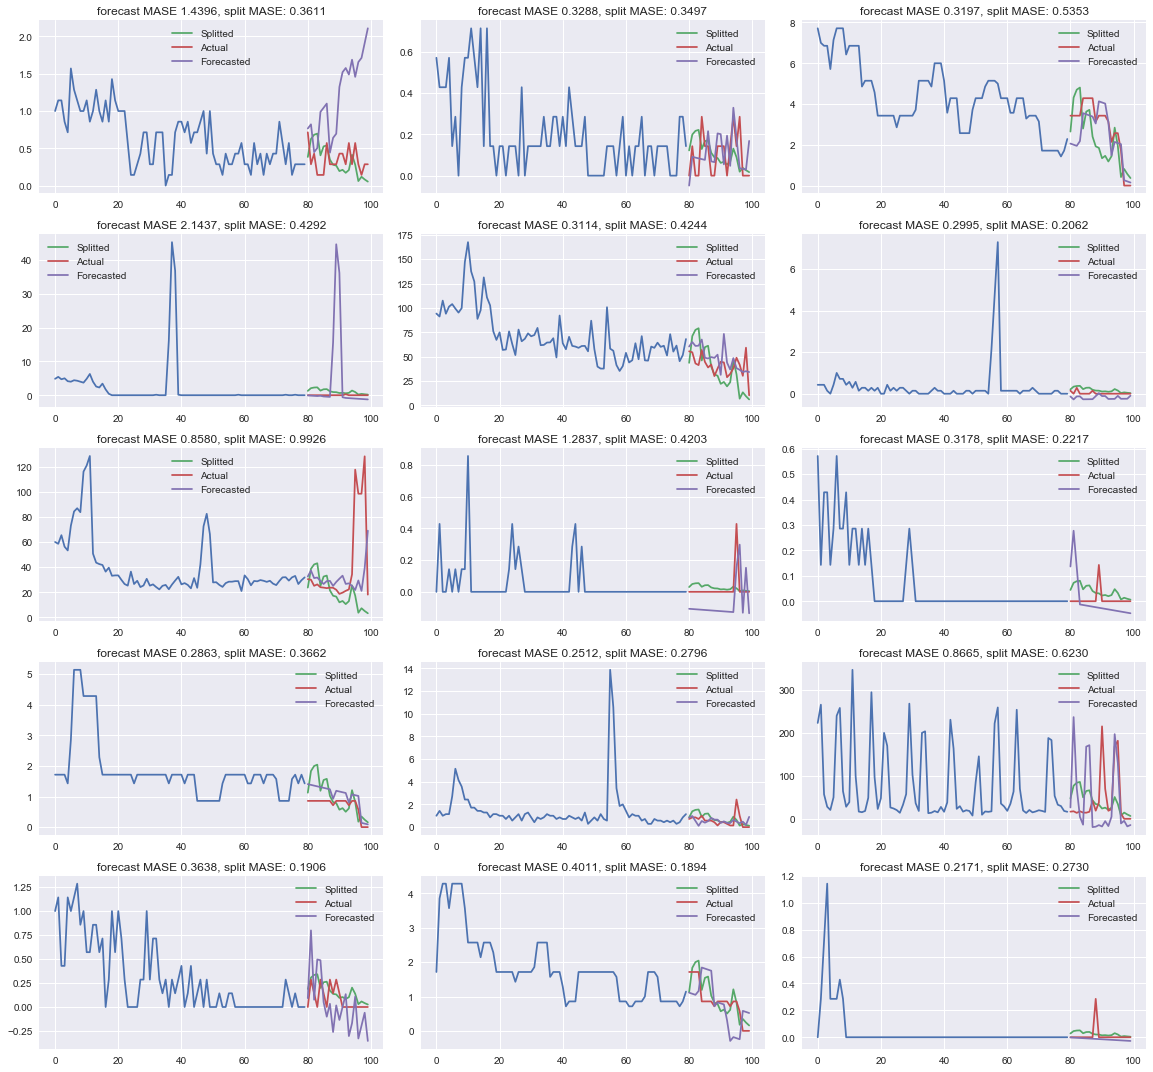

In [163]:
cluster = 99
plt.show()